In [1]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

# Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


   
d0 = pd.read_csv('train.csv')

print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

    
        

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [2]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


In [3]:
labels = l.head(15000)
data = d.head(15000)
data.shape

(15000, 784)

In [4]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler().fit_transform(data)
sd.shape

(15000, 784)

In [5]:
sample_data=sd
covarmatrix=np.matmul(sample_data.T,sample_data)
covarmatrix.shape

(784, 784)

In [6]:
from scipy.linalg import eigh
values, vectors =eigh(covarmatrix , eigvals=(782,783))
vectors=vectors.T
vectors.shape

(2, 784)

In [7]:
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)
new_coordinates.shape

(2, 15000)

In [8]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates)).T

# creating a new data frame for ploting the labeled points.
df = pd.DataFrame(data=new_coordinates, columns=["1st_principal", "2nd_principal", "label"])
print(dataframe.head())

ValueError: Shape of passed values is (15000, 2), indices imply (15000, 3)

In [9]:
df.head()

NameError: name 'df' is not defined

In [10]:
import seaborn as sns
sns.FacetGrid(df,hue='label',height=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()

NameError: name 'df' is not defined

In [11]:
#scikit

In [12]:
from sklearn.decomposition import PCA
pca=PCA()

In [13]:
pca.n_components = 2
pca_data =pca.fit_transform(sample_data)
pca_data.shape


(15000, 2)

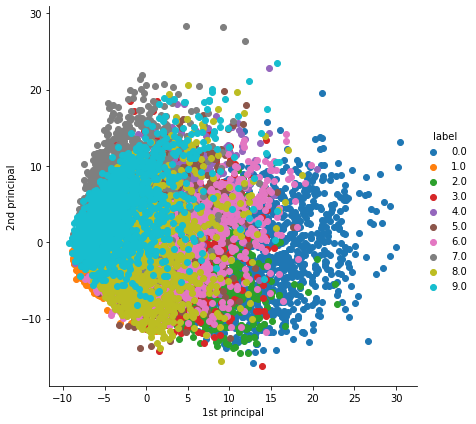

In [14]:
import seaborn as sns
pca_data =np.vstack((pca_data.T,labels)).T
pca_df = pd.DataFrame(data=pca_data,columns=("1st principal","2nd principal","label"))
sns.FacetGrid(pca_df,hue='label',height=6).map(plt.scatter,'1st principal','2nd principal').add_legend()